In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = 'sample_data/VMT1.csv'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
# Read the data from the file
data = pd.read_csv(filepath)

# Convert the date column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

df = data
# Filter the data for the desired time period
start_date = pd.to_datetime('2000-09-01')
end_date = pd.to_datetime('2023-03-01')
filtered_data = data[(data['DATE'] >= start_date) & (data['DATE'] <= end_date)]
filtered_data.set_index('DATE', inplace=True)

In [ ]:
# Show the first few rows of the dataset
# Create new shorter namevariables
data['VMT'] = data['VMTUSM227NFWA (Vehicle Miles Traveled, Millions of Miles, Monthly, Not Seasonally Adjusted)']
data['POPTHM'] = data['POPTHM (Population, Thousands, Monthly, Not Seasonally Adjusted)']
data['PI'] = data['PI  (Personal Income, Billions of Dollars, Seasonally Adjusted Annual Rate)']
data['TRANSIT'] = data['TRANSIT    (Public Transit Ridership, Thousands of Unlinked Trips, Monthly, Not Seasonally Adjusted)']
data['CPI'] = data['CPIAUCSL (Consumer Price Index for All Urban Consumers: All Items in U.S. City Average, Index 1982-1984=100, Monthly, Seasonally Adjusted)']
data['GASREGCOVM'] = data['GASREGCOVM  (US Regular Conventional Gas Price, Dollars per Gallon, Monthly, Not Seasonally Adjusted)']
data['UNRATE'] = data['UNRATE (Unemployment Rate, Percent, Monthly, Seasonally Adjusted)']
data['RATE'] = data['RATE (Finance Rate on Consumer Installment Loans at Commercial Banks, New Autos 48 Month Loan, Percent, Monthly, Not Seasonally Adjusted)']
data['CUSR0000SETA'] = data['CUSR0000SETA (Consumer Price Index for All Urban Consumers: New and Used Motor Vehicles in U.S. City Average, Index Dec 1997=100, Monthly, Seasonally Adjusted)']
data['TOTALSA'] = data['TOTALSA (Total Vehicle Sales, Millions of Units, Monthly, Seasonally Adjusted Annual Rate)']

print(data.head)

<bound method NDFrame.head of           DATE  \
0   2000-09-01   
1   2000-10-01   
2   2000-11-01   
3   2000-12-01   
4   2001-01-01   
..         ...   
266 2022-11-01   
267 2022-12-01   
268 2023-01-01   
269 2023-02-01   
270 2023-03-01   

     GASREGCOVM  (US Regular Conventional Gas Price, Dollars per Gallon, Monthly, Not Seasonally Adjusted)  \
0                                                1.525                                                       
1                                                1.508                                                       
2                                                1.495                                                       
3                                                1.418                                                       
4                                                1.427                                                       
..                                                 ...                                       

In [ ]:
import pandas as pd

# Assuming you have already imported pandas and have a dataframe named 'df'

# Check for missing values in the entire dataframe
has_missing_values = df.isnull().any().any()

# Alternatively, you can check for missing values in each column separately
# has_missing_values_per_column will be a Series with column names as index and True/False as values
has_missing_values_per_column = df.isnull().any()

if has_missing_values:
    print("The dataframe has missing values.")
else:
    print("The dataframe does not have any missing values.")


The dataframe does not have any missing values.


In [ ]:
pip install tabulate


In [ ]:
pip install python-docx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184487 sha256=0bb5320d416d0dac7a5dd655b8a0355abbf4dc403fcfb8c03b3db8b6d8bb340e
  Stored in directory: /root/.cache/pip/wheels/80/27/06/837436d4c3bd989b957a91679966f207bfd71d358d63a8194d
Successfully built python-docx


In [ ]:
import pandas as pd
from tabulate import tabulate
from docx import Document
from docx.shared import Inches

# Assuming you have already imported pandas and have a dataframe named 'df'

# Split the variables into two groups
num_variables = len(df.columns)
group1_variables = df.columns[:num_variables // 2]
group2_variables = df.columns[num_variables // 2:]

# Calculate the summary statistics for each group
summary_stats_group1 = df[group1_variables].describe()
summary_stats_group2 = df[group2_variables].describe()

# Format the summary statistics tables using the "pipe" table format
table_str_group1 = tabulate(summary_stats_group1, headers="keys", tablefmt="pipe")
table_str_group2 = tabulate(summary_stats_group2, headers="keys", tablefmt="pipe")

# Create lists of lists representing the table data for each group
table_data_group1 = [row.split("|") for row in table_str_group1.split("\n") if row.strip()]
table_data_group2 = [row.split("|") for row in table_str_group2.split("\n") if row.strip()]

# Export the tables to a Word document
doc = Document()
doc.add_heading("Summary Statistics - Group 1", level=1)

# Add the table for Group 1 to the document
num_rows_group1 = len(table_data_group1)
num_cols_group1 = len(table_data_group1[0])
table_group1 = doc.add_table(rows=num_rows_group1, cols=num_cols_group1, style="Table Grid")

for i, row in enumerate(table_data_group1):
    for j, cell in enumerate(row):
        table_group1.cell(i, j).text = cell.strip()

# Add a page break to start the next table on a new page
doc.add_page_break()

doc.add_heading("Summary Statistics - Group 2", level=1)

# Add the table for Group 2 to the document
num_rows_group2 = len(table_data_group2)
num_cols_group2 = len(table_data_group2[0])
table_group2 = doc.add_table(rows=num_rows_group2, cols=num_cols_group2, style="Table Grid")

for i, row in enumerate(table_data_group2):
    for j, cell in enumerate(row):
        table_group2.cell(i, j).text = cell.strip()

# Save the document
doc.save("summary_stats_tables.docx")


In [ ]:
# Construct variables in real terms
data['GAS_REAL'] = data['GASREGCOVM'] / data['CPI']
data['INCOME_REAL'] = data['PI'] /  data['CPI']

# Construct variables in per capita terms
data['POP'] = data['POPTHM'].replace(0, 1)  # Replace zero values with 1

data['TRANSIT_PER_CAPITA'] = data['TRANSIT'] / data['POP']
data['VMT_PER_CAPITA'] = data['VMT'] / data['POP']
data['INCOME_PER_CAPITA'] = data['PI'] /  data['POP']
data['INCOME_REAL_PER_CAPITA'] = data['INCOME_REAL'] / data['POP']


In [ ]:
import pandas as pd

# Initialize 'filtered_data' DataFrame
filtered_data = pd.DataFrame()

# Assign values to 'filtered_data' DataFrame columns
filtered_data['DATE'] = data['DATE']
filtered_data['CPI'] = data['CPI']
filtered_data['TRANSIT'] = data['TRANSIT']
filtered_data['GAS'] = data['GASREGCOVM']
filtered_data['GAS_REAL'] = data['GAS_REAL']
filtered_data['VMT'] = data['VMT']
filtered_data['PI'] = data['PI']
filtered_data['TRANSIT_PER_CAPITA'] = data['TRANSIT_PER_CAPITA']
filtered_data['VMT_PER_CAPITA'] = data['VMT_PER_CAPITA']
filtered_data['UNRATE'] = data['UNRATE']
filtered_data['RATE'] = data['RATE']
filtered_data['CUSR0000SETA'] = data['CUSR0000SETA']
filtered_data['TOTALSA'] = data['TOTALSA']
filtered_data['INCOME_PER_CAPITA'] = data['INCOME_PER_CAPITA']
filtered_data['INCOME_REAL_PER_CAPITA'] = data['INCOME_REAL_PER_CAPITA']

# Calculate percent changes
filtered_data['dCPI'] = filtered_data['CPI'].pct_change() * 100
filtered_data['dTRANSIT'] = filtered_data['TRANSIT'].pct_change() * 100
filtered_data['dGAS'] = filtered_data['GAS'].pct_change() * 100
filtered_data['rdGAS'] = filtered_data['GAS_REAL'].pct_change() * 100
filtered_data['dPI'] = data['PI'].pct_change() * 100
filtered_data['rdPI'] = data['INCOME_REAL'].pct_change() * 100
filtered_data['dVMT'] = filtered_data['VMT'].pct_change() * 100
filtered_data['dPOP'] = data['POPTHM'].pct_change() * 100
filtered_data['dTOTALSA'] = data['TOTALSA'].pct_change() * 100
filtered_data['dCPIUSED'] = data['CUSR0000SETA'].pct_change() * 100
filtered_data['dRATE'] = data['RATE'].pct_change() * 100
filtered_data['dTRANSIT_PER_CAPITA'] = filtered_data['TRANSIT_PER_CAPITA'].pct_change() * 100
filtered_data['dVMT_PER_CAPITA'] = filtered_data['VMT_PER_CAPITA'].pct_change() * 100
filtered_data['dINCOME_REAL_PER_CAPITA'] = filtered_data['INCOME_REAL_PER_CAPITA'].pct_change() * 100
forecast_data = pd.DataFrame()
forecast_data = filtered_data[['DATE', 'dVMT', 'dGAS', 'dTRANSIT', 'dCPI', 'dPOP', 'dRATE', 'UNRATE', 'dPI', 'RATE', 'dCPIUSED', 'dTOTALSA']]
# Drop the first row
filtered_data = filtered_data.drop(0)
forecast_data = forecast_data.drop(0)

# Reset the index
filtered_data = filtered_data.reset_index(drop=True)
forecast_data =forecast_data.reset_index(drop=True)
# Print the updated dataframe
print(forecast_data.head())


        DATE      dVMT      dGAS  dTRANSIT      dCPI      dPOP     dRATE  \
0 2000-10-01  3.770091 -1.114754  6.073275  0.172811  0.089036  0.000000   
1 2000-11-01 -5.781193 -0.862069 -4.127435  0.172513  0.084014  0.103842   
2 2000-12-01 -1.987712 -5.150502 -7.484194  0.229621  0.079359 -2.437759   
3 2001-01-01 -3.985988  0.634697  5.993457  0.572738  0.074714  0.000000   
4 2001-02-01 -4.201064  0.280308 -4.883212  0.227790  0.072545 -2.498671   

   UNRATE       dPI   RATE  dCPIUSED  dTOTALSA  
0     3.9  0.379886  9.630  0.099010 -6.111290  
1     3.9  0.186958  9.640  0.197824 -5.024552  
2     3.9  0.369826  9.405  0.394867 -2.476855  
3     4.2  1.136940  9.405  0.098328  8.815189  
4     4.2  0.393288  9.170  0.000000  0.985724  


In [ ]:
correlation_matrix = forecast_data.corr()
print(correlation_matrix)

              dVMT      dGAS  dTRANSIT      dCPI      dPOP     dRATE  \
dVMT      1.000000  0.238067  0.661605  0.030501 -0.054395 -0.044176   
dGAS      0.238067  1.000000  0.338232  0.767899 -0.111590 -0.068696   
dTRANSIT  0.661605  0.338232  1.000000  0.252888 -0.009559  0.030031   
dCPI      0.030501  0.767899  0.252888  1.000000 -0.143824  0.067767   
dPOP     -0.054395 -0.111590 -0.009559 -0.143824  1.000000 -0.142099   
dRATE    -0.044176 -0.068696  0.030031  0.067767 -0.142099  1.000000   
UNRATE    0.026462  0.012844 -0.057734 -0.161638  0.026249 -0.244404   
dPI       0.058392  0.032369 -0.065149 -0.044031 -0.066645  0.014082   
RATE     -0.006844  0.019105  0.004226  0.027799  0.514992 -0.043906   
dCPIUSED -0.008583  0.033993  0.084030  0.291142 -0.271071 -0.025803   
dTOTALSA  0.246514  0.129910  0.252009  0.078427 -0.051044 -0.054730   

            UNRATE       dPI      RATE  dCPIUSED  dTOTALSA  
dVMT      0.026462  0.058392 -0.006844 -0.008583  0.246514  
dGAS      0.0

<ipython-input-21-856e017fdfd1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = forecast_data.corr()


In [ ]:
forecast_data.describe

<bound method NDFrame.describe of           DATE       dVMT       dGAS   dTRANSIT      dCPI      dPOP  \
0   2000-10-01   3.770091  -1.114754   6.073275  0.172811  0.089036   
1   2000-11-01  -5.781193  -0.862069  -4.127435  0.172513  0.084014   
2   2000-12-01  -1.987712  -5.150502  -7.484194  0.229621  0.079359   
3   2001-01-01  -3.985988   0.634697   5.993457  0.572738  0.074714   
4   2001-02-01  -4.201064   0.280308  -4.883212  0.227790  0.072545   
..         ...        ...        ...        ...       ...       ...   
265 2022-11-01  -7.561529  -2.941985  -5.936413  0.205043  0.043694   
266 2022-12-01  -0.203490 -12.634561  -5.299792  0.131280  0.039786   
267 2023-01-01  -3.540851   5.512322  -0.379237  0.517074  0.033790   
268 2023-02-01  -5.526858   1.536570  -2.480700  0.370006  0.031088   
269 2023-03-01  16.119468   0.363196  15.342841  0.053042  0.034664   

         dRATE  UNRATE       dPI   RATE  dCPIUSED   dTOTALSA  
0     0.000000     3.9  0.379886  9.630  0.099010 

In [ ]:
!pip uninstall tslearn


In [ ]:
!pip install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 368.5/368.5 kB 4.6 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.stattools import zivot_andrews
from statsmodels.tsa.stattools import adfuller, kpss
import numpy as np
# Define a function to perform the stationarity tests
def perform_stationarity_tests(series, significance_level=0.05):
    # Perform the Augmented Dickey-Fuller test
    adf_result = adfuller(series)
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'ADF p-value: {adf_result[1]}')
    print(f'ADF: Series is {"not " if adf_result[1] > significance_level else ""}stationary\n')

    # Perform the Kwiatkowski-Phillips-Schmidt-Shin test
    kpss_result = kpss(series, nlags='auto')
    print(f'KPSS Statistic: {kpss_result[0]}')
    print(f'KPSS p-value: {kpss_result[1]}')
    print(f'KPSS: Series is {"not " if kpss_result[1] < significance_level else ""}stationary\n')

    # Perform the Zivot-Andrews test
    #za_result = zivot_andrews(series)
    #print(f'Zivot-Andrews Statistic: {za_result[0]}')
    #print(f'Zivot-Andrews p-value: {za_result[1]}')
    #print(f'Zivot-Andrews: Series is {"not " if za_result[1] > significance_level else ""}stationary\n')

print('Vehicle Miles Traveled growth:\n')
perform_stationarity_tests(forecast_data['dVMT'])

print('\nGas Price growth:\n')
perform_stationarity_tests(forecast_data['dGAS'])

print('\nTransit ridership growth:\n')
perform_stationarity_tests(forecast_data['dTRANSIT'])

print('Inflation rate:\n')
perform_stationarity_tests(forecast_data['dCPI'])

print('\nPop growth:\n')
perform_stationarity_tests(forecast_data['dPOP'])

print('Unemployment rate:\n')
perform_stationarity_tests(forecast_data['UNRATE'])

print('Personal Income:\n')
perform_stationarity_tests(forecast_data['dPI'])

print('\nFinance rate growth:\n')
perform_stationarity_tests(forecast_data['dRATE'])

diff12_rate = forecast_data['RATE'].diff().diff(12).dropna()
print('\nFinance rate growth transformed:\n')
perform_stationarity_tests(diff12_rate)

print('CPI Used Care:\n')
perform_stationarity_tests(forecast_data['dCPIUSED'])

print('\nTotal Vehicle Sales:\n')
perform_stationarity_tests(forecast_data['dTOTALSA'])


Vehicle Miles Traveled growth:

ADF Statistic: -4.799190502270621
ADF p-value: 5.45801887454221e-05
ADF: Series is stationary

KPSS Statistic: 0.016202767084600913
KPSS p-value: 0.1
KPSS: Series is stationary


Gas Price growth:

ADF Statistic: -5.885959172736733
ADF p-value: 3.0013010812246995e-07
ADF: Series is stationary

KPSS Statistic: 0.05198017971560016
KPSS p-value: 0.1
KPSS: Series is stationary


Transit ridership growth:

ADF Statistic: -4.5376948072033105
ADF p-value: 0.00016799666048121538
ADF: Series is stationary

KPSS Statistic: 0.07661847571463833
KPSS p-value: 0.1
KPSS: Series is stationary

Inflation rate:

ADF Statistic: -2.827748208679881
ADF p-value: 0.0544181470327364
ADF: Series is not stationary

KPSS Statistic: 0.28031014098398155
KPSS p-value: 0.1
KPSS: Series is stationary


Pop growth:

ADF Statistic: -1.568589675390007
ADF p-value: 0.49935000956856235
ADF: Series is not stationary

KPSS Statistic: 2.0074904240045353
KPSS p-value: 0.01
KPSS: Series is not s

<ipython-input-23-a7838b5925b4>:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, nlags='auto')
<ipython-input-23-a7838b5925b4>:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, nlags='auto')
<ipython-input-23-a7838b5925b4>:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, nlags='auto')
<ipython-input-23-a7838b5925b4>:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, nlags='auto')
<ipython-input-2

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
import pandas as pd

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Variable', 'ADF Statistic', 'ADF p-value', 'ADF Stationary',
                                   'KPSS Statistic', 'KPSS p-value', 'KPSS Stationary'])

# Define a function to perform the stationarity tests
def perform_stationarity_tests(series, variable_name, significance_level=0.05):
    adf_result = adfuller(series)
    adf_stationary = "Stationary" if adf_result[1] <= significance_level else "Not Stationary"

    kpss_result = kpss(series, nlags='auto')
    kpss_stationary = "Stationary" if kpss_result[1] >= significance_level else "Not Stationary"

    results_df.loc[len(results_df)] = [variable_name,
                                       format(adf_result[0], '.3f'), format(adf_result[1], '.2f'), adf_stationary,
                                       format(kpss_result[0], '.3f'), format(kpss_result[1], '.2f'), kpss_stationary]

# Your code for loading data and defining series goes here
# Compute the diff12_rate Series
diff12_rate = forecast_data['RATE'].diff().diff(12).dropna()

# Drop the first 13 rows from forecast_data to match the length of diff12_rate
forecast_data = forecast_data.iloc[13:]

# Now, add the diff12_rate as a new column in forecast_data
forecast_data['diff12 RATE'] = diff12_rate

# Perform stationarity tests for each variable
perform_stationarity_tests(forecast_data['dVMT'], 'VMT')
perform_stationarity_tests(forecast_data['dGAS'], 'GAS')
perform_stationarity_tests(forecast_data['dTRANSIT'], 'TRANSIT')
perform_stationarity_tests(forecast_data['dCPI'], 'CPI')
perform_stationarity_tests(forecast_data['dPOP'], 'POP')
perform_stationarity_tests(forecast_data['UNRATE'], 'UNRATE')
perform_stationarity_tests(forecast_data['dPI'], 'PI')
perform_stationarity_tests(forecast_data['RATE'], 'RATE')
perform_stationarity_tests(diff12_rate, 'RATE12')
perform_stationarity_tests(forecast_data['dCPIUSED'], 'CPIUSED')
perform_stationarity_tests(forecast_data['dTOTALSA'], 'TOTALSA')
# Repeat for other variables

# Save the results to a Word table
results_df.to_csv('stationarity_results.csv', index=False)

# Now you can use the CSV file to create a Word table


<ipython-input-27-8ecc1432cba2>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_data['diff12 RATE'] = diff12_rate
<ipython-input-27-8ecc1432cba2>:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, nlags='auto')
<ipython-input-27-8ecc1432cba2>:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, nlags='auto')
<ipython-input-27-8ecc1432cba2>:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up t

In [ ]:
import pandas as pd

# Assuming you have already imported forecast_data and have the datasets dTRANSIT, UNRATE, and RATE

# Compute the diff12_rate Series
diff12_rate = forecast_data['RATE'].diff().diff(12).dropna()

# Drop the first 13 rows from forecast_data to match the length of diff12_rate
forecast_data = forecast_data.iloc[13:]

# Now, add the diff12_rate as a new column in forecast_data
forecast_data['diff12 RATE'] = diff12_rate

# Now, forecast_data will have three new columns: 'dTRANSIT', 'UNRATE', and 'diff12 RATE'
# They will contain the data from dTRANSIT, UNRATE, and diff12_rate, respectively, aligned with the existing forecast_data dataset.

# Reset the index of the DataFrame, and the DATE variable will become a regular column
forecast_data.reset_index(inplace=True)

# Now, perform any operations on the DataFrame as needed, and if you want to set the DATE variable as the index again:

# Set the DATE variable as the index again
forecast_data.set_index('DATE', inplace=True)
forecast_data.describe


In [ ]:
!pip install pmdarima


In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from pmdarima import auto_arima
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Define the target variable (VMT growth) and the feature variables
y = forecast_data['dVMT']  # VMT growth
X = forecast_data[['dGAS', 'dTRANSIT', 'dCPI', 'dPOP', 'UNRATE', 'dPI', 'diff12 RATE', 'dCPIUSED', 'dTOTALSA']].iloc[:, :]  # Features


In [ ]:
# Create train/test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Fit each model and calculate MAE
models = [auto_arima, RandomForestRegressor, Ridge, DecisionTreeRegressor, GradientBoostingRegressor]
model_names = ['Auto_ARIMA', 'RandomForestRegressor', 'Ridge', 'DecisionTreeRegressor', 'GradientBoostingRegressor']
results = []

for i in range(len(models)):
    if model_names[i] == 'Auto_ARIMA':
        # Fit the Auto_ARIMA model
        arima = models[i](X=X_train, y=y_train, error_action='ignore', trace=True, suppress_warnings=True, maxiter=5, seasonal=True, m=12)
        arima.fit(y_train)
        preds = arima.predict(n_periods=len(y_test))
    else:
        # Fit the other models
        model = models[i]()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    # Calculate MAE
    mae = mean_absolute_error(y_test, preds)

    # Store result
    results.append((model_names[i], mae))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'MAE'])

# Print results
print(results_df)




Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1012.092, Time=2.25 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1261.319, Time=0.33 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=994.282, Time=1.08 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1132.891, Time=1.34 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1259.417, Time=0.56 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1256.544, Time=0.39 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=977.108, Time=3.14 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=939.195, Time=2.88 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=933.573, Time=2.98 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1143.258, Time=1.84 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=967.472, Time=2.77 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=1107.111, Time=2.18 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=962.327, Time=3.44 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=948.808, Time=1.11 sec
 ARIMA(2,0,0)(1,0,1)[12] i

# 0. Install and Import Dependencies

In [ ]:
!pip install Cython

In [ ]:
!pip install psycopg2

In [ ]:
!pip install pystan

In [ ]:
!pip install holidays

In [ ]:
!pip install Cmake

In [ ]:
!pip install wheel

In [ ]:
!pip install attrdict3

In [ ]:
!pip install prophet

In [ ]:
forecast_data.describe

In [ ]:
# library imports
import numpy as np
import pandas as pd
import torch
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# Define the target variable (VMT growth) and the feature variables
y = forecast_data['dVMT'] # VMT growth
X = forecast_data[['dGAS', 'dTRANSIT', 'dCPI', 'dPOP', 'UNRATE', 'dPI', 'diff12 RATE', 'dCPIUSED', 'dTOTALSA']].iloc[:, :]  # Features

# Create train/test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Convert 'y_train' and 'y_test' to DataFrame with proper column name
y_train_df = pd.DataFrame({'ds': X_train.index, 'y': y_train.values})
y_test_df = pd.DataFrame({'ds': X_test.index, 'y': y_test.values})

# Convert date columns to the correct datetime format for Prophet
y_train_df['ds'] = pd.to_datetime(y_train_df['ds'])
y_test_df['ds'] = pd.to_datetime(y_test_df['ds'])

# Fit each model and calculate MAE
models = [RandomForestRegressor, Ridge, DecisionTreeRegressor, GradientBoostingRegressor, Prophet, SARIMAX]
model_names = ['RandomForestRegressor', 'Ridge', 'DecisionTreeRegressor', 'GradientBoostingRegressor', 'Prophet', 'SARIMA']
results = []

for i in range(len(models)):
    if model_names[i] == 'Prophet':
        # Fit the Prophet model
        prophet = models[i](yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
        prophet_fit = prophet.fit(y_train_df)
        preds = prophet_fit.predict(y_test_df)[['ds', 'yhat']]
        preds.set_index('ds', inplace=True)

    elif model_names[i] == 'SARIMA':
        # Fit the SARIMA model
        sarima = models[i](endog=y_train, order=(1, 1, 0), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
        sarima_fit = sarima.fit()
        preds = sarima_fit.forecast(steps=len(y_test))

    else:
        # Fit other models
        model = models[i]()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    # Calculate MAE
    mae = mean_absolute_error(y_test, preds)

    # Store result
    results.append((model_names[i], mae))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'MAE'])

# Print results
pd.options.display.float_format = '{:.2f}'.format
print(results_df)





DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrsa8hoj/mx23pa26.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrsa8hoj/0yj6dpro.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19173', 'data', 'file=/tmp/tmpzrsa8hoj/mx23pa26.json', 'init=/tmp/tmpzrsa8hoj/0yj6dpro.json', 'output', 'file=/tmp/tmpzrsa8hoj/prophet_modelbxmuc7ft/prophet_model-20230803232640.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:26:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:26:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages

                       Model  MAE
0      RandomForestRegressor 5.17
1                      Ridge 4.91
2      DecisionTreeRegressor 6.09
3  GradientBoostingRegressor 5.87
4                    Prophet 3.98
5                     SARIMA 4.06


In [ ]:
print(predictions_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpywx05min/0e1bve7q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpywx05min/2t2t2hts.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34309', 'data', 'file=/tmp/tmpywx05min/0e1bve7q.json', 'init=/tmp/tmpywx05min/2t2t2hts.json', 'output', 'file=/tmp/tmpywx05min/prophet_modelgru8a274/prophet_model-20230803124535.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:45:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:45:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages

                       Model  MAE (1 Months)  MAE (4 Months)  MAE (8 Months)  \
0      RandomForestRegressor            6.30            5.61            4.95   
1                      Ridge            9.91            7.32            4.64   
2      DecisionTreeRegressor            1.36            8.27            5.70   
3  GradientBoostingRegressor            7.86            5.66            5.54   
4                    Prophet            8.43            3.98            9.71   
5                     SARIMA            0.80            0.50            1.13   

   MAE (12 Months)  MAE (16 Months)  
0             4.27             3.97  
1             3.89             4.95  
2             4.67             4.56  
3             4.41             4.39  
4             9.28             3.95  
5             1.13             3.03  


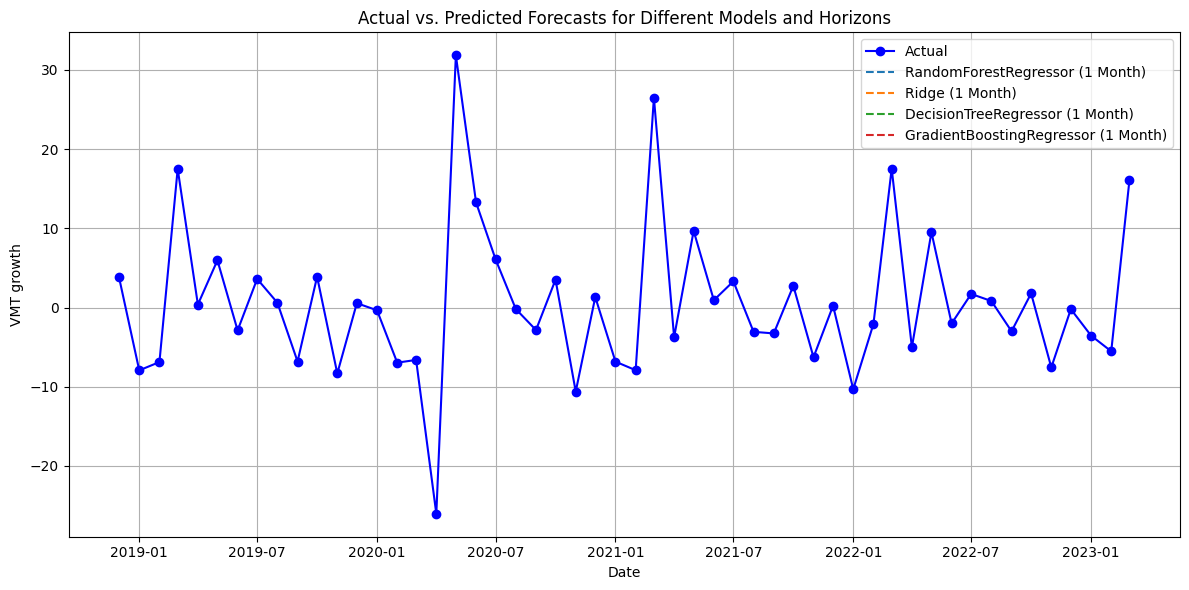

In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

# Define the target variable (VMT growth) and the feature variables
y = forecast_data['dVMT'] # VMT growth
X = forecast_data[['dGAS', 'dTRANSIT', 'dCPI', 'dPOP', 'UNRATE', 'dPI', 'diff12 RATE', 'dCPIUSED', 'dTOTALSA']].iloc[:, :]  # Features

# Create train/test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Convert 'y_train' and 'y_test' to DataFrame with proper column name
y_train_df = pd.DataFrame({'ds': X_train.index, 'y': y_train.values})
y_test_df = pd.DataFrame({'ds': X_test.index, 'y': y_test.values})

# Convert date columns to the correct datetime format for Prophet
y_train_df['ds'] = pd.to_datetime(y_train_df['ds'])
y_test_df['ds'] = pd.to_datetime(y_test_df['ds'])

# Fit each model and calculate MAE
models = [RandomForestRegressor, Ridge, DecisionTreeRegressor, GradientBoostingRegressor, Prophet, SARIMAX]
model_names = ['RandomForestRegressor', 'Ridge', 'DecisionTreeRegressor', 'GradientBoostingRegressor', 'Prophet', 'SARIMA']
results = []

# Prediction horizons (1 month, 4 months, 8 months, 12 months, and 16 months ahead)
horizons = [1, 4, 8, 12, 16]

for i in range(len(models)):
    if model_names[i] == 'Prophet':
        # Fit the Prophet model
        prophet = models[i](yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
        prophet_fit = prophet.fit(y_train_df)
        # Create future dataframes for each horizon
        future_dataframes = [prophet_fit.make_future_dataframe(periods=h, freq='M') for h in horizons]

        # Make predictions for each horizon
        preds_list = [prophet_fit.predict(df) for df in future_dataframes]

        # Calculate MAE for each horizon
        mae_list = [mean_absolute_error(y_test_df['y'], preds['yhat'][-len(y_test_df):]) for preds in preds_list]

        # Store results
        results.append([model_names[i]] + mae_list)
    elif model_names[i] == 'SARIMA':
        # Fit the SARIMA model
        sarima = models[i](endog=y_train, order=(1, 1, 0), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
        sarima_fit = sarima.fit()
        # Make predictions for each horizon
        preds_list = [sarima_fit.forecast(steps=h) for h in horizons]

        # Calculate MAE for each horizon
        mae_list = [mean_absolute_error(y_test.iloc[:h], preds) for h, preds in zip(horizons, preds_list)]

        # Store results
        results.append([model_names[i]] + mae_list)
    else:
        # Fit and predict for other models
        model = models[i]()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        # Create columns for predictions for each horizon
        for horizon in horizons:
            col_name = f'{model_names[i]} ({horizon} Months)'
            predictions_df[col_name] = np.nan
            predictions_df.loc[predictions_df.index[-horizon:], col_name] = preds[:horizon]

        # Calculate MAE for each horizon
        mae_list = [mean_absolute_error(y_test.iloc[:horizon], preds[:horizon]) for horizon in horizons]
        # Store results
        results.append([model_names[i]] + mae_list)

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Model'] + [f'MAE ({horizon} Months)' for horizon in horizons])

# Print results
pd.options.display.float_format = '{:.2f}'.format
print(results_df)

# Plot the actual values and predictions for each horizon
plt.figure(figsize=(12, 6))
plt.plot(predictions_df.index, predictions_df['y'], label='Actual', marker='o', linestyle='-', color='blue')

for horizon in horizons:
    for i in range(len(models)):
        model_name = model_names[i]
        col_name = f'{model_name} ({horizon} Month)'
        # Check if the column exists in the DataFrame before plotting
        if col_name in predictions_df.columns:
            plt.plot(predictions_df.index[-horizon:], predictions_df[col_name][-horizon:], label=f'{model_name} ({horizon} Month)', linestyle='--')

plt.xlabel('Date')
plt.ylabel('VMT growth')
plt.title('Actual vs. Predicted Forecasts for Different Models and Horizons')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

# Define the target variable (VMT growth) and the feature variables
y = forecast_data['dVMT'] # VMT growth
X = forecast_data[['dGAS', 'dTRANSIT', 'dCPI', 'dPOP', 'UNRATE', 'dPI', 'diff12 RATE', 'dCPIUSED', 'dTOTALSA']].iloc[:, :]  # Features

# Create train/test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Convert 'y_train' and 'y_test' to DataFrame with proper column name
y_train_df = pd.DataFrame({'ds': X_train.index, 'y': y_train.values})
y_test_df = pd.DataFrame({'ds': X_test.index, 'y': y_test.values})

# Convert date columns to the correct datetime format for Prophet
y_train_df['ds'] = pd.to_datetime(y_train_df['ds'])
y_test_df['ds'] = pd.to_datetime(y_test_df['ds'])

# Fit each model and calculate metrics
models = [RandomForestRegressor, Ridge, DecisionTreeRegressor, GradientBoostingRegressor, Prophet, SARIMAX]
model_names = ['RandomForestRegressor', 'Ridge', 'DecisionTreeRegressor', 'GradientBoostingRegressor', 'Prophet', 'SARIMA']
results = []

# Prediction horizons (1 month, 4 months, 8 months, 12 months, and 16 months ahead)
horizons = [1, 4, 8, 12, 16]

for i in range(len(models)):
    if model_names[i] == 'Prophet':
        # Fit the Prophet model
        prophet = models[i](yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
        prophet_fit = prophet.fit(y_train_df)
        # Create future dataframes for each horizon
        future_dataframes = [prophet_fit.make_future_dataframe(periods=h, freq='M') for h in horizons]

        # Make predictions for each horizon
        preds_list = [prophet_fit.predict(df) for df in future_dataframes]

        # Calculate metrics for each horizon
        mae_list = [mean_absolute_error(y_test_df['y'], preds['yhat'][-len(y_test_df):]) for preds in preds_list]
        rmse_list = [np.sqrt(mean_squared_error(y_test_df['y'], preds['yhat'][-len(y_test_df):])) for preds in preds_list]
        mape_list = [mean_absolute_percentage_error(y_test_df['y'], preds['yhat'][-len(y_test_df):]) for preds in preds_list]
        r2_list = [r2_score(y_test_df['y'], preds['yhat'][-len(y_test_df):]) for preds in preds_list]

        # Store results
        results.append([model_names[i]] + mae_list + rmse_list + mape_list + r2_list)
    elif model_names[i] == 'SARIMA':
        # Fit the SARIMA model
        sarima = models[i](endog=y_train, order=(1, 1, 0), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
        sarima_fit = sarima.fit()
        # Make predictions for each horizon
        preds_list = [sarima_fit.forecast(steps=h) for h in horizons]

        # Calculate metrics for each horizon
        mae_list = [mean_absolute_error(y_test.iloc[:h], preds) for h, preds in zip(horizons, preds_list)]
        rmse_list = [np.sqrt(mean_squared_error(y_test.iloc[:h], preds)) for h, preds in zip(horizons, preds_list)]
        mape_list = [mean_absolute_percentage_error(y_test.iloc[:h], preds) for h, preds in zip(horizons, preds_list)]
        r2_list = [r2_score(y_test.iloc[:h], preds) for h, preds in zip(horizons, preds_list)]

        # Store results
        results.append([model_names[i]] + mae_list + rmse_list + mape_list + r2_list)
    else:
        # Fit and predict for other models
        model = models[i]()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        # Calculate metrics for each horizon
        mae_list = [mean_absolute_error(y_test.iloc[:horizon], preds[:horizon]) for horizon in horizons]
        rmse_list = [np.sqrt(mean_squared_error(y_test.iloc[:horizon], preds[:horizon])) for horizon in horizons]
        mape_list = [mean_absolute_percentage_error(y_test.iloc[:horizon], preds[:horizon]) for horizon in horizons]
        r2_list = [r2_score(y_test.iloc[:horizon], preds[:horizon]) for horizon in horizons]

        # Store results
        results.append([model_names[i]] + mae_list + rmse_list + mape_list + r2_list)

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'MAE (1 Month)', 'MAE (4 Months)', 'MAE (8 Months)', 'MAE (12 Months)', 'MAE (16 Months)',
                                             'RMSE (1 Month)', 'RMSE (4 Months)', 'RMSE (8 Months)', 'RMSE (12 Months)', 'RMSE (16 Months)',
                                             'MAPE (1 Month)', 'MAPE (4 Months)', 'MAPE (8 Months)', 'MAPE (12 Months)', 'MAPE (16 Months)',
                                             'R2 (1 Month)', 'R2 (4 Months)', 'R2 (8 Months)', 'R2 (12 Months)', 'R2 (16 Months)'])

# Print results
pd.options.display.float_format = '{:.2f}'.format
print(results_df)

# Output results to a Word file
output_file = 'Train split Forecasting results.docx'
doc = Document()
doc.add_heading('Forecasting Results', level=1)

# Convert the DataFrame to a table and add it to the document
df_to_table = doc.add_table(results_df.shape[0] + 1, results_df.shape[1])
# Add the column headers
for i, column_name in enumerate(results_df.columns):
    df_to_table.cell(0, i).text = column_name
# Add the data from the DataFrame
for i in range(results_df.shape[0]):
    for j in range(results_df.shape[1]):
        df_to_table.cell(i + 1, j).text = str(results_df.values[i, j])

# Save the document
doc.save(output_file)
print(f"Results saved to {output_file}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrsa8hoj/pop39iwr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrsa8hoj/4_czwc6p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_thr

                       Model  MAE (1 Month)  MAE (4 Months)  MAE (8 Months)  \
0      RandomForestRegressor           6.95            5.46            4.92   
1                      Ridge           9.91            7.32            4.64   
2      DecisionTreeRegressor           1.36            9.14            7.08   
3  GradientBoostingRegressor           7.86            5.71            5.56   
4                    Prophet           8.43            3.98            9.71   
5                     SARIMA           0.80            0.50            1.13   

   MAE (12 Months)  MAE (16 Months)  RMSE (1 Month)  RMSE (4 Months)  \
0             4.20             3.98            6.95             5.58   
1             3.89             4.95            9.91             7.56   
2             5.27             5.09            1.36            10.26   
3             4.45             4.41            7.86             6.75   
4             9.28             3.95           11.12             7.18   
5             

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from docx import Document

# Your existing code for data preparation and model evaluation

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'MAE (1 Month)', 'MAE (4 Months)', 'MAE (8 Months)', 'MAE (12 Months)', 'MAE (16 Months)', 'RMSE (1 Month)', 'RMSE (4 Months)', 'RMSE (8 Months)', 'RMSE (12 Months)', 'RMSE (16 Months)', 'MAPE (1 Month)', 'MAPE (4 Months)', 'MAPE (8 Months)', 'MAPE (12 Months)', 'MAPE (16 Months)', 'R2 (1 Month)', 'R2 (4 Months)', 'R2 (8 Months)', 'R2 (12 Months)', 'R2 (16 Months)'])

# Output results to a Word file
output_file = 'Forecasting_results.docx'
doc = Document()
doc.add_heading('Forecasting Results', level=1)

# Define a function to add a DataFrame as a table to the document
def add_dataframe_as_table(doc, dataframe, heading):
    doc.add_heading(heading, level=2)
    table = doc.add_table(dataframe.shape[0] + 1, dataframe.shape[1])
    for i, column_name in enumerate(dataframe.columns):
        table.cell(0, i).text = column_name
    for i in range(dataframe.shape[0]):
        for j in range(dataframe.shape[1]):
            table.cell(i + 1, j).text = "{:.2f}".format(dataframe.values[i, j])

# Add each DataFrame as a table to the document
add_dataframe_as_table(doc, results_df.filter(regex='MAE'), 'MAE Results')
add_dataframe_as_table(doc, results_df.filter(regex='RMSE'), 'RMSE Results')
add_dataframe_as_table(doc, results_df.filter(regex='MAPE'), 'MAPE Results')
add_dataframe_as_table(doc, results_df.filter(regex='R2'), 'R2 Results')

# Save the document
doc.save(output_file)
print(f"Results saved to {output_file}")







In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

# Define the target variable (VMT growth) and the feature variables
y = forecast_data['dVMT']  # VMT growth
X = forecast_data[
    ['dGAS', 'dTRANSIT', 'dCPI', 'dPOP', 'UNRATE', 'dPI', 'diff12 RATE', 'dCPIUSED', 'dTOTALSA']
].iloc[:, :]  # Features

# Create initial training and testing sets
start_date_initial = pd.to_datetime('2000-09-01')
end_date_initial = pd.to_datetime('2015-02-01')
X_train_initial, X_test_initial = X[start_date_initial:end_date_initial], X[end_date_initial:]
y_train_initial, y_test_initial = y[start_date_initial:end_date_initial], y[end_date_initial:]

# List to store evaluation results for each model
results = []

# Prediction horizons (1 month, 4 months, 8 months, 12 months, and 16 months ahead)
horizons = [1, 4, 8, 12, 16]

# Rolling window start and end dates
start_date_rolling = pd.to_datetime('2015-03-01')
end_date_rolling = pd.to_datetime('2023-03-01')

while start_date_rolling <= end_date_rolling:
    # Create rolling training and testing sets
    X_train_rolling, X_test_rolling = X[start_date_initial:start_date_rolling], X[start_date_rolling:end_date_rolling]
    y_train_rolling, y_test_rolling = y[start_date_initial:start_date_rolling], y[start_date_rolling:end_date_rolling]

    # Fit and calculate metrics for each model
    models = [
        RandomForestRegressor, Ridge, DecisionTreeRegressor, GradientBoostingRegressor, Prophet, SARIMAX
    ]
    model_names = [
        'RandomForestRegressor', 'Ridge', 'DecisionTreeRegressor', 'GradientBoostingRegressor', 'Prophet', 'SARIMA'
    ]

    for i in range(len(models)):
        model_name = model_names[i]

        if model_name == 'Prophet':
            # Fit the Prophet model
            prophet = models[i](yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
            prophet_fit = prophet.fit(y_train_df)
            # Create future dataframes for each horizon
            future_dataframes = [prophet_fit.make_future_dataframe(periods=h, freq='M') for h in horizons]

            # Make predictions for each horizon
            preds_list = [prophet_fit.predict(df) for df in future_dataframes]

            # Calculate metrics for each horizon
            mae_list = [mean_absolute_error(y_test_df['y'], preds['yhat'][-len(y_test_df):]) for preds in preds_list]
            rmse_list = [np.sqrt(mean_squared_error(y_test_df['y'], preds['yhat'][-len(y_test_df):])) for preds in preds_list]
            mape_list = [mean_absolute_percentage_error(y_test_df['y'], preds['yhat'][-len(y_test_df):]) for preds in preds_list]
            r2_list = [r2_score(y_test_df['y'], preds['yhat'][-len(y_test_df):]) for preds in preds_list]

            # Store results
            results.append([model_names[i]] + mae_list + rmse_list + mape_list + r2_list)

        elif model_name == 'SARIMA':
            # Fit the SARIMA model
            sarima = models[i](endog=y_train, order=(1, 1, 0), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
            sarima_fit = sarima.fit()
            # Make predictions for each horizon
            preds_list = [sarima_fit.forecast(steps=h) for h in horizons]

            # Calculate metrics for each horizon
            mae_list = [mean_absolute_error(y_test.iloc[:h], preds) for h, preds in zip(horizons, preds_list)]
            rmse_list = [np.sqrt(mean_squared_error(y_test.iloc[:h], preds)) for h, preds in zip(horizons, preds_list)]
            mape_list = [mean_absolute_percentage_error(y_test.iloc[:h], preds) for h, preds in zip(horizons, preds_list)]
            r2_list = [r2_score(y_test.iloc[:h], preds) for h, preds in zip(horizons, preds_list)]

            # Store results
            results.append([model_names[i]] + mae_list + rmse_list + mape_list + r2_list)

        else:
            # Fit and predict for other models
            model = models[i]()
            model.fit(X_train_rolling, y_train_rolling)
            preds = model.predict(X_test_rolling)

            # Calculate MAE, RMSE, MAPE, and R2 for each horizon
            mae_list = [mean_absolute_error(y_test_rolling.iloc[:horizon], preds[:horizon]) for horizon in horizons]
            rmse_list = [np.sqrt(mean_squared_error(y_test_rolling.iloc[:horizon], preds[:horizon])) for horizon in horizons]
            mape_list = [mean_absolute_percentage_error(y_test_rolling.iloc[:horizon], preds[:horizon]) for horizon in horizons]
            r2_list = [r2_score(y_test_rolling.iloc[:horizon], preds[:horizon]) for horizon in horizons]

            # Store results
            results.append([model_name] + mae_list + rmse_list + mape_list + r2_list)

    # Move the rolling window by one month
    start_date_rolling += pd.DateOffset(months=1)

# Convert results to DataFrame
columns = ['Model']
for horizon in horizons:
    columns += [f'MAE ({horizon})', f'RMSE ({horizon})', f'MAPE ({horizon})', f'R2 ({horizon})']

results_df = pd.DataFrame(results, columns=columns)

# Print results
pd.options.display.float_format = '{:.2f}'.format
print(results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrsa8hoj/3f3inzs2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzrsa8hoj/rayoz4fm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_thr

                         Model  MAE (1)  RMSE (1)  MAPE (1)  R2 (1)  MAE (4)  \
0        RandomForestRegressor     0.57      2.65      3.51    3.72     4.11   
1                        Ridge     4.58      2.75      3.29    3.87     3.93   
2        DecisionTreeRegressor     0.00      3.19      4.00    3.94     4.10   
3    GradientBoostingRegressor     0.59      2.69      4.48    3.93     3.92   
4                      Prophet     8.43      3.98      9.71    9.28     3.95   
..                         ...      ...       ...       ...     ...      ...   
577                      Ridge     5.94      5.94      5.94    5.94     5.94   
578      DecisionTreeRegressor     0.00      0.00      0.00    0.00     0.00   
579  GradientBoostingRegressor     1.46      1.46      1.46    1.46     1.46   
580                    Prophet     8.43      3.98      9.71    9.28     3.95   
581                     SARIMA     0.80      0.50      1.13    1.13     3.03   

     RMSE (4)  MAPE (4)  R2 (4)  MAE (8

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from docx import Document

# Your existing code for data preparation and model evaluation

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'MAE (1 Month)', 'MAE (4 Months)', 'MAE (8 Months)', 'MAE (12 Months)', 'MAE (16 Months)', 'RMSE (1 Month)', 'RMSE (4 Months)', 'RMSE (8 Months)', 'RMSE (12 Months)', 'RMSE (16 Months)', 'MAPE (1 Month)', 'MAPE (4 Months)', 'MAPE (8 Months)', 'MAPE (12 Months)', 'MAPE (16 Months)', 'R2 (1 Month)', 'R2 (4 Months)', 'R2 (8 Months)', 'R2 (12 Months)', 'R2 (16 Months)'])

# Output results to a Word file
output_file = 'Rolling Forecasting_results.docx'
doc = Document()
doc.add_heading('Forecasting Results', level=1)

# Define a function to add a DataFrame as a table to the document
def add_dataframe_as_table(doc, dataframe, heading):
    doc.add_heading(heading, level=2)
    table = doc.add_table(dataframe.shape[0] + 1, dataframe.shape[1])
    for i, column_name in enumerate(dataframe.columns):
        table.cell(0, i).text = column_name
    for i in range(dataframe.shape[0]):
        for j in range(dataframe.shape[1]):
            table.cell(i + 1, j).text = "{:.2f}".format(dataframe.values[i, j])

# Add each DataFrame as a table to the document
add_dataframe_as_table(doc, results_df.filter(regex='MAE'), 'MAE Results')
add_dataframe_as_table(doc, results_df.filter(regex='RMSE'), 'RMSE Results')
add_dataframe_as_table(doc, results_df.filter(regex='MAPE'), 'MAPE Results')
add_dataframe_as_table(doc, results_df.filter(regex='R2'), 'R2 Results')

# Save the document
doc.save(output_file)
print(f"Results saved to {output_file}")


Results saved to Rolling Forecasting_results.docx


In [ ]:
# ... (previous code remains unchanged)

# Convert results to DataFrame
columns = ['Model']
for horizon in horizons:
    columns += [f'MAE ({horizon})', f'RMSE ({horizon})', f'MAPE ({horizon})', f'R2 ({horizon})']

results_df = pd.DataFrame(results, columns=columns)

# Calculate the average for each horizon and each model
results_df_grouped = results_df.groupby('Model').mean()

# Print results
pd.options.display.float_format = '{:.2f}'.format
print(results_df_grouped)


                           MAE (1)  RMSE (1)  MAPE (1)  R2 (1)  MAE (4)  \
Model                                                                     
DecisionTreeRegressor         0.00      4.37      5.02    5.21     5.37   
GradientBoostingRegressor     1.08      3.98      4.35    4.40     4.44   
Prophet                       8.43      3.98      9.71    9.28     3.95   
RandomForestRegressor         1.80      4.01      4.29    4.35     4.39   
Ridge                         4.24      4.61      4.73    4.79     4.80   
SARIMA                        0.80      0.50      1.13    1.13     3.03   

                           RMSE (4)  MAPE (4)  R2 (4)  MAE (8)  RMSE (8)  \
Model                                                                      
DecisionTreeRegressor          0.00      6.16    6.88     7.07      7.15   
GradientBoostingRegressor      1.08      5.08    5.67     5.78      5.81   
Prophet                       11.12      7.18   12.93    12.71      7.16   
RandomForestRegress

In [ ]:
import matplotlib.pyplot as plt
from docx import Document
from tabulate import tabulate

# ... (Rest of the code)

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'MAE (1 Month)', 'MAE (4 Months)', 'MAE (8 Months)', 'MAE (12 Months)', 'MAE (16 Months)',
                                             'RMSE (1 Month)', 'RMSE (4 Months)', 'RMSE (8 Months)', 'RMSE (12 Months)', 'RMSE (16 Months)',
                                             'MAPE (1 Month)', 'MAPE (4 Months)', 'MAPE (8 Months)', 'MAPE (12 Months)', 'MAPE (16 Months)',
                                             'R2 (1 Month)', 'R2 (4 Months)', 'R2 (8 Months)', 'R2 (12 Months)', 'R2 (16 Months)'])

# Print results
pd.options.display.float_format = '{:.2f}'.format
print(results_df)

# Output results to a Word file
output_file = 'Forecasting_results.docx'
doc = Document()
doc.add_heading('Forecasting Results', level=1)

# Convert the DataFrame to a table and add it to the document
table_str = tabulate(results_df, headers='keys', tablefmt='grid')
doc.add_paragraph(table_str)

# Save the document
doc.save(output_file)
print(f"Results saved to {output_file}")

                       Model  MAE (1 Month)  MAE (4 Months)  MAE (8 Months)  \
0      RandomForestRegressor           6.39            5.77            4.78   
1                      Ridge           9.91            7.32            4.64   
2      DecisionTreeRegressor           2.12            9.33            7.22   
3  GradientBoostingRegressor           7.86            5.76            5.56   
4                    Prophet           8.43            3.98            9.71   
5                     SARIMA           0.80            0.50            1.13   

   MAE (12 Months)  MAE (16 Months)  RMSE (1 Month)  RMSE (4 Months)  \
0             4.26             3.93            6.39             5.85   
1             3.89             4.95            9.91             7.56   
2             5.37             5.17            2.12            10.29   
3             4.42             4.38            7.86             6.85   
4             9.28             3.95           11.12             7.18   
5             

In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt
from docx import Document

# ... (Rest of the code)

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'MAE (1 Month)', 'MAE (4 Months)', 'MAE (8 Months)', 'MAE (12 Months)', 'MAE (16 Months)',
                                             'RMSE (1 Month)', 'RMSE (4 Months)', 'RMSE (8 Months)', 'RMSE (12 Months)', 'RMSE (16 Months)',
                                             'MAPE (1 Month)', 'MAPE (4 Months)', 'MAPE (8 Months)', 'MAPE (12 Months)', 'MAPE (16 Months)',
                                             'R2 (1 Month)', 'R2 (4 Months)', 'R2 (8 Months)', 'R2 (12 Months)', 'R2 (16 Months)'])

# Create a function to format the results for each metric
def format_metric_results(metric):
    metric_df = results_df[['Model', metric]]
    metric_df = metric_df.set_index('Model').T
    metric_df.columns.name = None
    return metric_df

# Output results to a Word file
output_file = 'results.docx'
doc = Document()
doc.add_heading('Forecasting Results', level=1)

# Loop through the metrics and add them to the document
metrics = ['MAE (1 Month)', 'MAE (4 Months)', 'MAE (8 Months)', 'MAE (12 Months)', 'MAE (16 Months)',
           'RMSE (1 Month)', 'RMSE (4 Months)', 'RMSE (8 Months)', 'RMSE (12 Months)', 'RMSE (16 Months)',
           'MAPE (1 Month)', 'MAPE (4 Months)', 'MAPE (8 Months)', 'MAPE (12 Months)', 'MAPE (16 Months)',
           'R2 (1 Month)', 'R2 (4 Months)', 'R2 (8 Months)', 'R2 (12 Months)', 'R2 (16 Months)']

for metric in metrics:
    doc.add_heading(metric, level=2)
    metric_df = format_metric_results(metric)
    table = doc.add_table(rows=len(metric_df.index) + 1, cols=len(metric_df.columns))
    table.autofit = False
    table.columns[0].width = 2000000
    col_index = 0
    for col in metric_df.columns:
        table.cell(0, col_index).text = col
        col_index += 1
    for index, row in metric_df.iterrows():
        row_cells = table.add_row().cells
        row_cells[0].text = index
        col_index = 1
        for cell in row_cells:
            cell.text = "{:.2f}".format(value)
            col_index += 1

# Save the document
doc.save(output_file)
print(f"Results saved to {output_file}")


Results saved to results.docx


In [ ]:
pip install tabulate


In [ ]:
pip install python-docx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 35.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184489 sha256=131d40da24068e2fcd4c5b7e847abf8ec5496f66fe3f60334e413ac505aa34ed
  Stored in directory: /root/.cache/pip/wheels/80/27/06/837436d4c3bd989b957a91679966f207bfd71d358d63a8194d
Successfully built python-docx


In [ ]:
pip install statsmodels python-docx


In [ ]:
import statsmodels.api as sm
y = forecast_data['dVMT']

# Define the independent variables for the sixth model
X6 = forecast_data[['dGAS',
         'dTRANSIT',
         'dCPI',
         'dPOP',
         'UNRATE',
         'dPI',
         'diff12 RATE']]

# Add a constant to the independent variables matrix
X6 = sm.add_constant(X6)

# Fit the sixth OLS model
model6 = sm.OLS(y, X6)
results6 = model6.fit()

results6.summary()
# Get the summary as a string
summary_str = results6.summary().as_text()

# Export the summary to a Word document
doc = Document()
doc.add_heading("Regression Summary6", level=1)

# Add the summary to the document
doc.add_paragraph(summary_str)

# Save the document
doc.save("regression6s_summary.docx")

In [ ]:
import statsmodels.api as sm
# Define the independent variables for the seventh model
X7 = forecast_data[['dGAS',
         'dTRANSIT',
         'dCPI',
         'dPOP',
         'UNRATE',
         'dPI',
         'diff12 RATE',
         'dCPIUSED']]

# Add a constant to the independent variables matrix
X7 = sm.add_constant(X7)

# Fit the seventh OLS model
model7 = sm.OLS(y, X7)
results7 = model7.fit()

results7.summary()
# Get the summary as a string
summary_str = results7.summary().as_text()

# Export the summary to a Word document
doc = Document()
doc.add_heading("Regression Summary7", level=1)

# Add the summary to the document
doc.add_paragraph(summary_str)

# Save the document
doc.save("regression7s_summary.docx")

In [ ]:
import statsmodels.api as sm
# Define the independent variables for the eighth model
X8 = forecast_data[['dGAS',
         'dTRANSIT',
         'dCPI',
         'dPOP',
         'UNRATE',
         'dPI',
         'diff12 RATE',
         'dCPIUSED',
         'dTOTALSA']]

# Add a constant to the independent variables matrix
X8 = sm.add_constant(X8)

# Fit the eighth OLS model
model8 = sm.OLS(y, X8)
results8 = model8.fit()

results8.summary()
# Get the summary as a string
summary_str = results8.summary().as_text()

# Export the summary to a Word document
doc = Document()
doc.add_heading("Regression Summary8", level=1)

# Add the summary to the document
doc.add_paragraph(summary_str)

# Save the document
doc.save("regression8s_summary.docx")


In [ ]:
import statsmodels.api as sm

# Adjust for inflation using the CPI
filtered_data['VMT_real_per_capita'] = filtered_data['VMT_PER_CAPITA'] / filtered_data['CPI']
filtered_data['INCOME_REAL_PER_CAPITA'] = filtered_data['INCOME_PER_CAPITA'] / filtered_data['CPI']
filtered_data['TRANSIT_real_per_capita'] = filtered_data['TRANSIT_PER_CAPITA'] / filtered_data['CPI']

filtered_data['dTRANSIT_PER_CAPITA'] = filtered_data['TRANSIT_PER_CAPITA'].pct_change() * 100
filtered_data['dVMT_PER_CAPITA'] = filtered_data['VMT_PER_CAPITA'].pct_change() * 100
filtered_data['dINCOME_PER_CAPITA'] = filtered_data['INCOME_PER_CAPITA'].pct_change() * 100
filtered_data['dINCOME_REAL_PER_CAPITA'] = filtered_data['INCOME_REAL_PER_CAPITA'].pct_change() * 100
# Drop rows with missing values
filtered_data.dropna(inplace=True)

# Define the dependent variable for the per capita model
y_per_capita = filtered_data['dVMT_PER_CAPITA']

# Define the independent variables for the per capita model
X_per_capita = filtered_data[['dGAS', 'dTRANSIT_PER_CAPITA', 'UNRATE', 'dINCOME_PER_CAPITA']]


# Add a constant to the independent variables matrix
X_per_capita = sm.add_constant(X_per_capita)

# Fit the per capita OLS model
model_per_capita = sm.OLS(y_per_capita, X_per_capita)
results_per_capita = model_per_capita.fit()

results_per_capita.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        dVMT_PER_CAPITA   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     53.84
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           4.45e-33
Time:                        15:00:34   Log-Likelihood:                -831.41
No. Observations:                 267   AIC:                             1673.
Df Residuals:                     262   BIC:                             1691.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.3367      1.071     -1.248      0.213      -3.446       0.773
dGAS                    0.0096      0.054      0.179      0.858      -0.096       0.115
dTRANSIT_PER_CAPITA     0.5970      0.044     13.671      0.000       0.511       0.683
UNRATE                  0.2270      0.172      1.320      0.188      -0.112       0.566
dINCOME_PER_CAPITA      0.3751      0.173      2.166      0.031       0.034       0.716
==============================================================================
Omnibus:                        5.113   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                5.709
Skew:                           0.186   Prob(JB):                       0.0576
Kurtosis:                       3.612   Cond. No.                         28.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statsmodels.api as sm

# Adjust for inflation using the CPI
filtered_data['VMT_real_per_capita'] = filtered_data['VMT_PER_CAPITA'] / filtered_data['CPI']
filtered_data['INCOME_REAL_PER_CAPITA'] = filtered_data['INCOME_PER_CAPITA'] / filtered_data['CPI']
filtered_data['TRANSIT_real_per_capita'] = filtered_data['TRANSIT_PER_CAPITA'] / filtered_data['CPI']

filtered_data['dVMT_PER_CAPITA'] = filtered_data['VMT_PER_CAPITA'].pct_change() * 100
filtered_data['dINCOME_REAL_PER_CAPITA'] = filtered_data['INCOME_REAL_PER_CAPITA'].pct_change() * 100
filtered_data['dVMT_real_per_capita'] = filtered_data['VMT_real_per_capita'].pct_change() * 100
filtered_data['dTRANSIT_real_per_capita'] = filtered_data['TRANSIT_real_per_capita'].pct_change() * 100


# Drop rows with missing values
filtered_data.dropna(inplace=True)

# Define the dependent variable for the per capita model real terms
y_per_capita = filtered_data['dVMT_real_per_capita']

# Define the independent variables for the per capita model
X_per_capita = filtered_data[['dGAS', 'dTRANSIT_real_per_capita', 'UNRATE', 'dINCOME_REAL_PER_CAPITA']]


# Add a constant to the independent variables matrix
X_per_capita = sm.add_constant(X_per_capita)

# Fit the per capita OLS model
model_per_capita = sm.OLS(y_per_capita, X_per_capita)
results_per_capita = model_per_capita.fit()

results_per_capita.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     dVMT_real_per_capita   R-squared:                       0.454
Model:                              OLS   Adj. R-squared:                  0.446
Method:                   Least Squares   F-statistic:                     54.34
Date:                  Sat, 29 Jul 2023   Prob (F-statistic):           2.79e-33
Time:                          15:02:02   Log-Likelihood:                -827.27
No. Observations:                   266   AIC:                             1665.
Df Residuals:                       261   BIC:                             1682.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.2272      1.070     -1.147      0.252      -3.334       0.879
dGAS                         0.0077      0.053      0.145      0.885      -0.097       0.112
dTRANSIT_real_per_capita     0.6053      0.043     13.928      0.000       0.520       0.691
UNRATE                       0.2116      0.172      1.232      0.219      -0.127       0.550
dINCOME_REAL_PER_CAPITA      0.4608      0.170      2.704      0.007       0.125       0.796
==============================================================================
Omnibus:                        5.989   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.272
Skew:                           0.187   Prob(JB):                       0.0264
Kurtosis:                       3.719   Cond. No.                         28.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import statsmodels.api as sm

# Preprocess the data (create the per capita and real terms variables, drop rows with missing values, etc.)

# Define the dependent variable and independent variables
y = forecast_data['dVMT']
X = forecast_data[['dGAS',
         'dTRANSIT',
         'dCPI',
         'dPOP',
         'UNRATE',
         'dPI',
         'diff12 RATE',
         'dCPIUSED',
         'dTOTALSA']]
# Define the models
models = [
    DecisionTreeRegressor(random_state=0),
    RandomForestRegressor(random_state=0),
    GradientBoostingRegressor(random_state=0)
]

# Set up cross-validation
kfold = KFold(n_splits=5, random_state=0, shuffle=True)

# Evaluate each model
for model in models:
    scores = cross_val_score(model, X, y, cv=kfold)
    print(f"{model.__class__.__name__}: {np.mean(scores)} +/- {np.std(scores)}")


DecisionTreeRegressor: 0.0220060927676611 +/- 0.15306229077007064
RandomForestRegressor: 0.4345287145176234 +/- 0.0822073468752683
GradientBoostingRegressor: 0.3691421159809987 +/- 0.100173049785711


In [ ]:
# Fit the models
dt_model = DecisionTreeRegressor(random_state=0).fit(X, y)
rf_model = RandomForestRegressor(random_state=0).fit(X, y)
gb_model = GradientBoostingRegressor(random_state=0).fit(X, y)

# Get feature importances
dt_importances = dt_model.feature_importances_
rf_importances = rf_model.feature_importances_
gb_importances = gb_model.feature_importances_

# Print feature importances
print("Decision Tree feature importances:")
for feature, importance in zip(X.columns, dt_importances):
    print(f"{feature}: {importance}")

print("Random Forest feature importances:")
for feature, importance in zip(X.columns, rf_importances):
    print(f"{feature}: {importance}")

print("Gradient Boosting feature importances:")
for feature, importance in zip(X.columns, gb_importances):
    print(f"{feature}: {importance}")


Decision Tree feature importances:
dGAS: 0.049385889091337086
dTRANSIT: 0.5797323956289677
dCPI: 0.026878258000337052
dPOP: 0.11962457006775326
UNRATE: 0.0299241710467849
dPI: 0.028832647030805306
diff12 RATE: 0.03197829972433824
dCPIUSED: 0.05684051388336701
dTOTALSA: 0.07680325552630946
Random Forest feature importances:
dGAS: 0.04372798979294453
dTRANSIT: 0.625980571046664
dCPI: 0.03364824688296464
dPOP: 0.07662010286004084
UNRATE: 0.04004398112677106
dPI: 0.04173301846108915
diff12 RATE: 0.03478998685437591
dCPIUSED: 0.05384699467581503
dTOTALSA: 0.04960910829933467
Gradient Boosting feature importances:
dGAS: 0.04098438704033575
dTRANSIT: 0.62334574117516
dCPI: 0.03603557126055297
dPOP: 0.09963275856858711
UNRATE: 0.024149196481358232
dPI: 0.02620943708793503
diff12 RATE: 0.02481180304448401
dCPIUSED: 0.05727422502426911
dTOTALSA: 0.06755688031731795


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the models on the training data
dt_model = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)
rf_model = RandomForestRegressor(random_state=0).fit(X_train, y_train)
gb_model = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)

# Make predictions on the test data
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

# Compute the MSE for each model
dt_mse = mean_squared_error(y_test, dt_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)

# Print the MSE for each model
print(f"Decision Tree MSE: {dt_mse}")
print(f"Random Forest MSE: {rf_mse}")
print(f"Gradient Boosting MSE: {gb_mse}")


Decision Tree MSE: 53.23377809053658
Random Forest MSE: 27.9952687221615
Gradient Boosting MSE: 30.86004019589835
